<a href="https://colab.research.google.com/github/Shubham04689/colab_notebooks/blob/main/Bagging_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objective

At the end of the experiment, you will be able to :

* perform Data Pre-processing
* perform Bagging classifier

## Dataset

### Description

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of many passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Build a predictive model that answers the question: “what sort of people were more likely to survive?” using titanic's passenger data (ie name, age, gender, socio-economic class, etc).

<br/>

### Data Set Characteristics:

**PassengerId:** Id of the Passenger

**Ticket_Class:** Socio-economic status (SES)
  * 1st = Upper
  * 2nd = Middle
  * 3rd = Lower

**Name:** Surname, First Names of the Passenger

**Sex:** Gender of the Passenger

**Age:** Age of the Passenger

**Siblings_Spouse:**	No. of siblings/spouse of the passenger aboard the Titanic

**Parents_Children:**	No. of parents / children of the passenger aboard the Titanic

**Ticket_Number:**	Ticket number

**Fare:** Passenger fare

**Cabin:**	Cabin number

**Embarked:** Port of Embarkation

**Survived:** Survived or Not information

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

# Download the dataset from the provided link
!wget  https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Titanic.csv

# Load the dataset into a pandas DataFrame
iris_df = pd.read_csv('Titanic.csv')

# Print the first few rows of the DataFrame to check if the data loaded correctly
print(iris_df.head())

--2024-10-17 17:20:07--  https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Titanic.csv
Resolving cdn.iiith.talentsprint.com (cdn.iiith.talentsprint.com)... 172.105.52.210
Connecting to cdn.iiith.talentsprint.com (cdn.iiith.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78088 (76K) [application/octet-stream]
Saving to: ‘Titanic.csv.1’

Titanic.csv.1       100%[===================>]  76.26K   182KB/s    in 0.4s    

2024-10-17 17:20:09 (182 KB/s) - ‘Titanic.csv.1’ saved [78088/78088]

   PassengerId Ticket_Class  \
0            1    3rd class   
1            2    1st class   
2            3    3rd class   
3            4    1st class   
4            5    3rd class   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, 

## Data Pre-Processing

### Load the data and print the first five records

**Hint:** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

In [5]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Ticket_Class,Name,Sex,Age,Siblings_Spouse,Parents_Children,Ticket_Number,Fare,Cabin,Embarked,Survived
0,1,3rd class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,No
1,2,1st class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Yes
2,3,3rd class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Yes
3,4,1st class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Yes
4,5,3rd class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,No


### Data Cleaning

* Generate [Descriptive Statistics](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) of the dataframe

* Count [NaN values in each column](https://stackoverflow.com/a/26266451) of the dataframe

* Fill the blanks in the age column as follows:
  * Fill the age of the survived people with the average age of the survived people
  * Similarly, fill the remaining blanks with the average age of not survived people

  **Hint:** [DataFrame.where](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html) for replacing values with the **`False`** condition

* Drop unnecessary columns which are not contributing for the prediction of a person survival

* Make sure the final dataframe does not have any null or nan values. Delete the rows which has missing values.

*  **Example:**
  * PassengerId column can never decide survival of a person, hence it can be dropped






In [6]:
df.describe()

,PassengerId,Age,Siblings_Spouse,Parents_Children,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isna().sum()

,0
PassengerId,0
Ticket_Class,0
Name,0
Sex,0
Age,177
Siblings_Spouse,0
Parents_Children,0
Ticket_Number,0
Fare,0
Cabin,687


In [8]:
# Finding the mean age of "Survived" people
meanS= df[df.Survived=='Yes'].Age.mean()
df.Age = df.Age.where(~((df.Age.isna()) & (df['Survived']=='Yes')), meanS)
df.isna().sum()

,0
PassengerId,0
Ticket_Class,0
Name,0
Sex,0
Age,125
Siblings_Spouse,0
Parents_Children,0
Ticket_Number,0
Fare,0
Cabin,687


In [9]:
# Finding the mean age of "Not Survived" people
meanNS = df[df.Survived == 'No'].Age.mean()
df.Age.fillna(meanNS,inplace=True)
df.isna().sum()

<ipython-input-9-4aa4c236afd3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(meanNS,inplace=True)


,0
PassengerId,0
Ticket_Class,0
Name,0
Sex,0
Age,0
Siblings_Spouse,0
Parents_Children,0
Ticket_Number,0
Fare,0
Cabin,687


In [10]:
# Other way of doing it without using df.where()

# means = df.groupby(['Survived'])['Age'].mean()
# df = df.set_index('Survived')
# df['Age'] = df['Age'].fillna(means)
# df = df.reset_index()
# df.isna().sum()

In [11]:
df.isna().sum()

,0
PassengerId,0
Ticket_Class,0
Name,0
Sex,0
Age,0
Siblings_Spouse,0
Parents_Children,0
Ticket_Number,0
Fare,0
Cabin,687


In [12]:
# Dropping useless columns

df.drop(columns=['PassengerId', 'Name','Ticket_Number', 'Fare', 'Cabin'], inplace=True)
df.head()

,Ticket_Class,Sex,Age,Siblings_Spouse,Parents_Children,Embarked,Survived
0,3rd class,male,22.0,1,0,Southampton,No
1,1st class,female,38.0,1,0,Cherbourg,Yes
2,3rd class,female,26.0,0,0,Southampton,Yes
3,1st class,female,35.0,1,0,Southampton,Yes
4,3rd class,male,35.0,0,0,Southampton,No


In [13]:
survivedQ = df.loc[(df.Embarked == 'Queenstown')&(df.Survived == 'Yes')].shape[0]
not_survivedQ = df.loc[(df.Embarked == 'Queenstown')&(df.Survived == 'No')].shape[0]

survivedC = df.loc[(df.Embarked == 'Cherbourg')&(df.Survived == 'Yes')].shape[0]
not_survivedC = df.loc[(df.Embarked == 'Cherbourg')&(df.Survived == 'No')].shape[0]

survivedS = df.loc[(df.Embarked == 'Southampton')&(df.Survived == 'Yes')].shape[0]
not_survivedS = df.loc[(df.Embarked == 'Southampton')&(df.Survived == 'No')].shape[0]

print(survivedQ, not_survivedQ)
print(survivedC, not_survivedC)
print(survivedS, not_survivedS)

# As there are significant changes in the survival rate based on which port the passengers aboard the ship. We cannot delete the whole embarked column(It is useful)

30 47
93 75
219 427


### Convert categorical values to numerical
**Hint:** Use [Sklearn LabelEncoder's](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) fit_transform method

In [14]:
df.head()

,Ticket_Class,Sex,Age,Siblings_Spouse,Parents_Children,Embarked,Survived
0,3rd class,male,22.0,1,0,Southampton,No
1,1st class,female,38.0,1,0,Cherbourg,Yes
2,3rd class,female,26.0,0,0,Southampton,Yes
3,1st class,female,35.0,1,0,Southampton,Yes
4,3rd class,male,35.0,0,0,Southampton,No


In [15]:
df.dtypes

,0
Ticket_Class,object
Sex,object
Age,float64
Siblings_Spouse,int64
Parents_Children,int64
Embarked,object
Survived,object


In [16]:
le_t = preprocessing.LabelEncoder()
df['Ticket_Class'] = le_t.fit_transform(df['Ticket_Class'])

le_s = preprocessing.LabelEncoder()
df['Sex'] = le_s.fit_transform(df['Sex'])

le_e = preprocessing.LabelEncoder()
df['Embarked'] = le_e.fit_transform(df['Embarked'])

le_sur = preprocessing.LabelEncoder()
df['Survived'] = le_sur.fit_transform(df['Survived'])
df.head()

,Ticket_Class,Sex,Age,Siblings_Spouse,Parents_Children,Embarked,Survived
0,2,1,22.0,1,0,2,0
1,0,0,38.0,1,0,0,1
2,2,0,26.0,0,0,2,1
3,0,0,35.0,1,0,2,1
4,2,1,35.0,0,0,2,0


###  Consider the target labels as **Survived Column** and remaining as the features

* Print the shape of the features and labels


In [17]:
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]
print(features.shape)
print(labels.shape)

(891, 6)
(891,)


###  Split the data into train and test sets




In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(623, 6) (268, 6) (623,) (268,)


### Build the classification model using bagging technique

In [19]:
from sklearn.ensemble import BaggingClassifier

Bag = BaggingClassifier()
Bag.fit(X_train, y_train)
bag_y_pred = Bag.predict(X_test)

# Accuracy Score of the  Bagging Classifier Model
accuracy_score(y_test, bag_y_pred)

0.7835820895522388

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate a classification report
print(classification_report(y_test, bag_y_pred))

# Generate a confusion matrix
print(confusion_matrix(y_test, bag_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       157
           1       0.75      0.72      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268

[[130  27]
 [ 31  80]]


              precision    recall  f1-score   support

           0       0.81      0.83      0.82       157
           1       0.75      0.72      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



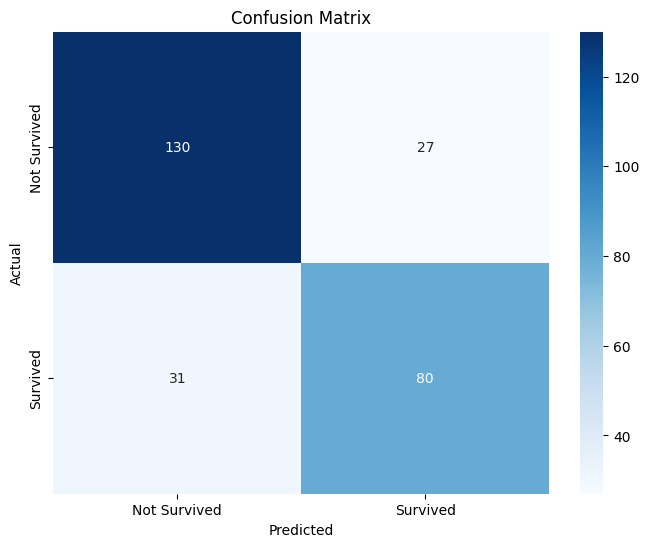

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a classification report with precision, recall, F1-score, and support
print(classification_report(y_test, bag_y_pred))

# Generate a confusion matrix
cm = confusion_matrix(y_test, bag_y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()